In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [ ]:
img=image.load_img("../tomatodataset/train/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.jpg")

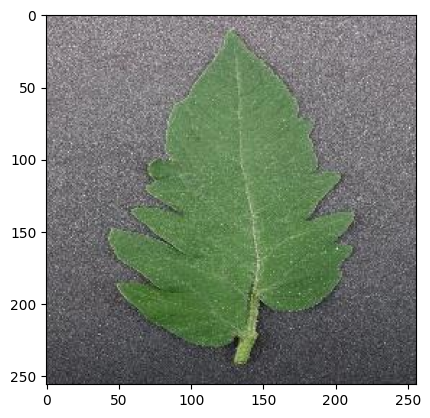

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("../tomatodataset/train/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.jpg").shape

(256, 256, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)

In [10]:
train_dataset=train.flow_from_directory('../tomatodataset/train/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='sparse'
                                   )
valid_dataset=train.flow_from_directory('../tomatodataset/val/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='sparse'
                                   )
test_dataset=train.flow_from_directory('../tomatodataset/test/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='sparse'
                                   )

Found 12837 images belonging to 10 classes.
Found 1832 images belonging to 10 classes.
Found 3676 images belonging to 10 classes.


In [11]:
train_dataset.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [16]:
modal=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'), 
    tf.keras.layers.Dense(10,activation='softmax')
])

In [17]:

modal.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [18]:
modal.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
modal_fit=modal.fit(train_dataset, steps_per_epoch=401,validation_data=valid_dataset, validation_steps=57,
    verbose=1,
    epochs=20)

Epoch 1/20
401/401 [==============================] - 619s 2s/step - loss: 1.6618 - accuracy: 0.3881 - val_loss: 1.1707 - val_accuracy: 0.5883
Epoch 2/20
401/401 [==============================] - 621s 2s/step - loss: 0.9112 - accuracy: 0.6734 - val_loss: 0.7035 - val_accuracy: 0.7577
Epoch 3/20
401/401 [==============================] - 612s 2s/step - loss: 0.6716 - accuracy: 0.7595 - val_loss: 0.5613 - val_accuracy: 0.8004
Epoch 4/20
401/401 [==============================] - 611s 2s/step - loss: 0.5092 - accuracy: 0.8212 - val_loss: 0.5121 - val_accuracy: 0.8300
Epoch 5/20
401/401 [==============================] - 611s 2s/step - loss: 0.4227 - accuracy: 0.8529 - val_loss: 0.5605 - val_accuracy: 0.7911
Epoch 6/20
401/401 [==============================] - 610s 2s/step - loss: 0.3637 - accuracy: 0.8671 - val_loss: 0.4307 - val_accuracy: 0.8492
Epoch 7/20
401/401 [==============================] - 611s 2s/step - loss: 0.3300 - accuracy: 0.8845 - val_loss: 0.4242 - val_accuracy: 0.8569

In [21]:
scores = modal.evaluate(test_dataset)

115/115 [==============================] - 55s 476ms/step - loss: 0.3125 - accuracy: 0.9091


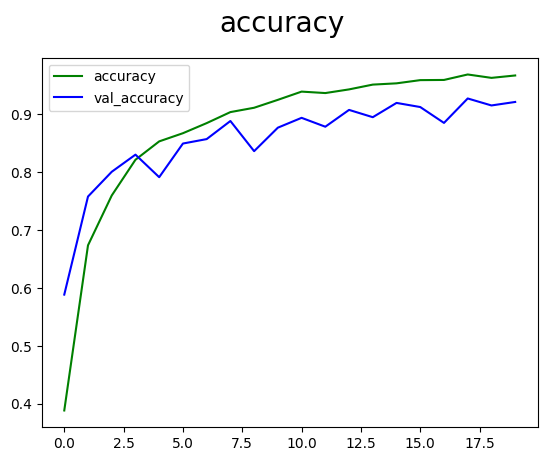

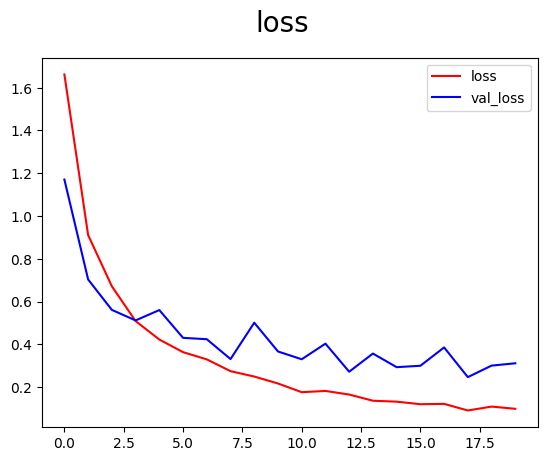

In [27]:
fig=plt.figure()
plt.plot(modal_fit.history['accuracy'],color='green',label='accuracy')
plt.plot(modal_fit.history['val_accuracy'],color='blue',label='val_accuracy')
plt.suptitle('accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig=plt.figure()
plt.plot(modal_fit.history['loss'],color='red',label='loss')
plt.plot(modal_fit.history['val_loss'],color='blue',label='val_loss')
plt.suptitle('loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [33]:
count=0
for image_batch, label_batch in train_dataset:
#     print(label_batch)
    print(image_batch[0])
    break
class_names = list(train_dataset.class_indices.keys())
class_names

[[[0.5372549  0.4901961  0.5058824 ]
  [0.5019608  0.454902   0.47058827]
  [0.45882356 0.41176474 0.427451  ]
  ...
  [0.6        0.5568628  0.57254905]
  [0.59607846 0.5529412  0.5686275 ]
  [0.5921569  0.54901963 0.5647059 ]]

 [[0.5568628  0.50980395 0.5254902 ]
  [0.5372549  0.4901961  0.5058824 ]
  [0.5137255  0.4666667  0.48235297]
  ...
  [0.6039216  0.56078434 0.5764706 ]
  [0.60784316 0.5647059  0.5803922 ]
  [0.60784316 0.5647059  0.5803922 ]]

 [[0.5176471  0.47058827 0.48627454]
  [0.5254902  0.4784314  0.49411768]
  [0.5254902  0.4784314  0.49411768]
  ...
  [0.60784316 0.5647059  0.5803922 ]
  [0.60784316 0.5647059  0.5803922 ]
  [0.60784316 0.5647059  0.5803922 ]]

 ...

 [[0.6039216  0.56078434 0.5764706 ]
  [0.5882353  0.54509807 0.56078434]
  [0.5686275  0.5254902  0.5411765 ]
  ...
  [0.6666667  0.627451   0.6313726 ]
  [0.65882355 0.61960787 0.62352943]
  [0.6509804  0.6117647  0.6156863 ]]

 [[0.5764706  0.53333336 0.54901963]
  [0.56078434 0.5176471  0.53333336]


['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

first image to predict
actual label: Tomato___Tomato_mosaic_virus
1/1 [==============================] - 0s 379ms/step
predicted label: Tomato___Tomato_mosaic_virus


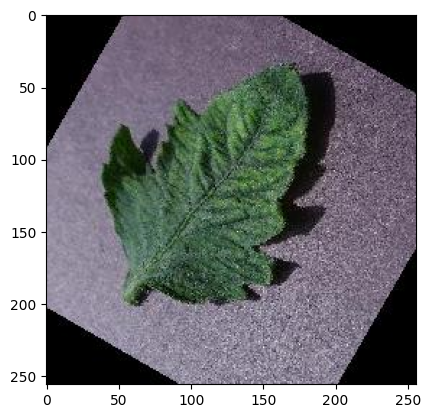

In [38]:
import numpy as np


for image_batch, label_batch in test_dataset:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = modal.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

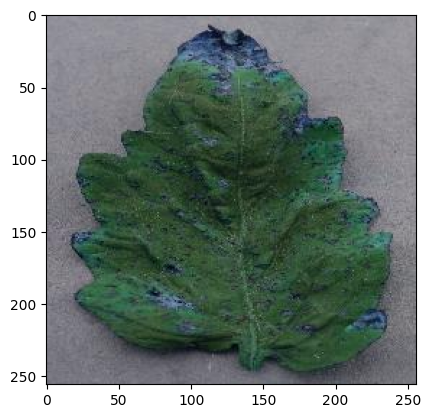

In [51]:
testimg="../tomatodataset/test/Tomato___Bacterial_spot/1aeee055-1c5f-4aab-a4af-bfe860f7dc46___GCREC_Bact.Sp 3034.jpg"
im=cv2.imread(testimg)
plt.imshow(im)
plt.show()

In [52]:
resize=tf.image.resize(im,(256,256))
ans=modal.predict(np.expand_dims(resize/255,0))
print(ans)
res=np.argmax(ans)
print(res)
class_names[res]

1/1 [==============================] - 0s 45ms/step
[[9.92305577e-02 8.92596066e-01 2.41335103e-04 7.63410842e-03
  2.93584511e-04 1.08158154e-07 1.94536324e-06 2.28186377e-06
  2.11339901e-09 2.59451813e-12]]
1


'Tomato___Early_blight'

In [53]:
modal.save(os.path.join('../models','leafdiseasesclassifier.h5'))

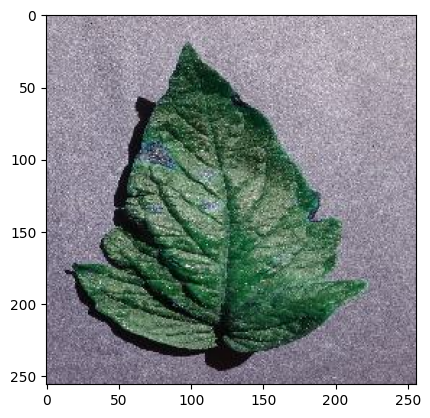

1/1 [==============================] - 0s 457ms/step
52.71


'Tomato___Early_blight'

In [74]:
model=load_model('../models/leafdiseasesclassifier.h5')
testimg="../models/00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.jpg"
img=image.load_img(testimg)
im=cv2.imread(testimg)
plt.imshow(im)
plt.show()
img_array=image.img_to_array(img)
img_array1=np.expand_dims(img_array/255,0)
pre=model.predict(img_array1)
ans=np.argmax(pre[0])
acc=round(100*np.max(pre[0]),2)
print(acc)
class_names=['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']
class_names[ans]
#class_names[np.argmax(pre[0])]